*Data Science Course - Telkom Digital Talent Incubator*


---




# **Classification**

#### ***Import Libraries***

In [ ]:
# Import Library
import pandas as pd
import sklearn.metrics as metrics
from sklearn.model_selection import GridSearchCV
import numpy as np
from sklearn.pipeline import make_pipeline  
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt

#### ***Input Dataset***

In [ ]:
# Import Data to Google Colab
df_x = pd.read_csv('https://raw.githubusercontent.com/dealtron/Project-lol/master/data/diabetes.csv', sep = ',')

In [ ]:
# Show 10 first Row
df_x.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


#### ***Data Visualization***

0    500
1    268
Name: Outcome, dtype: int64


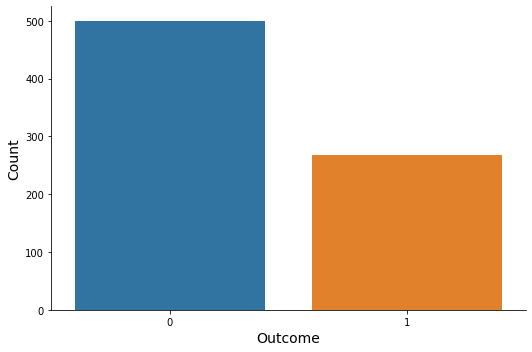

In [ ]:
c_depo = df_x['Outcome'].value_counts()
print(c_depo)
sns.catplot(x='Outcome',kind="count", data=df_x, height=5, aspect=1.5)
plt.xlabel("Outcome", size=14)
plt.ylabel("Count", size=14)
plt.tight_layout()

#### ***Data Preprocessing***

In [ ]:
df = df_x.copy()

In [ ]:
df[['Glucose','BloodPressure','SkinThickness','BMI']] = df_x[['Glucose','BloodPressure','SkinThickness','BMI']].replace(0,np.NaN)

In [ ]:
# Check for Missing Values
df.isnull().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                       0
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

In [ ]:
def median_target(var):   
    temp = df[df[var].notnull()]
    temp = temp[[var, 'Outcome']].groupby(['Outcome'])[[var]].median().reset_index()
    return temp

In [ ]:
median_target('Glucose')

,Outcome,Glucose
0,0,107.0
1,1,140.0


In [ ]:
df.loc[(df['Outcome'] == 0 ) & (df['Glucose'].isnull()), 'Glucose'] = 107
df.loc[(df['Outcome'] == 1 ) & (df['Glucose'].isnull()), 'Glucose'] = 140

In [ ]:
median_target('BloodPressure')

,Outcome,BloodPressure
0,0,70.0
1,1,74.5


In [ ]:
df.loc[(df['Outcome'] == 0 ) & (df['BloodPressure'].isnull()), 'BloodPressure'] = 70
df.loc[(df['Outcome'] == 1 ) & (df['BloodPressure'].isnull()), 'BloodPressure'] = 74.5

In [ ]:
median_target('SkinThickness')

,Outcome,SkinThickness
0,0,27.0
1,1,32.0


In [ ]:
df.loc[(df['Outcome'] == 0 ) & (df['SkinThickness'].isnull()), 'SkinThickness'] = 27
df.loc[(df['Outcome'] == 1 ) & (df['SkinThickness'].isnull()), 'SkinThickness'] = 32

In [ ]:
median_target('BMI')

,Outcome,BMI
0,0,30.1
1,1,34.3


In [ ]:
df.loc[(df['Outcome'] == 0 ) & (df['BMI'].isnull()), 'BMI'] = 30.1
df.loc[(df['Outcome'] == 1 ) & (df['BMI'].isnull()), 'BMI'] = 34.3

In [ ]:
# Check for Missing Values
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

#### ***Correlation Matrix***

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

(9.5, -0.5)

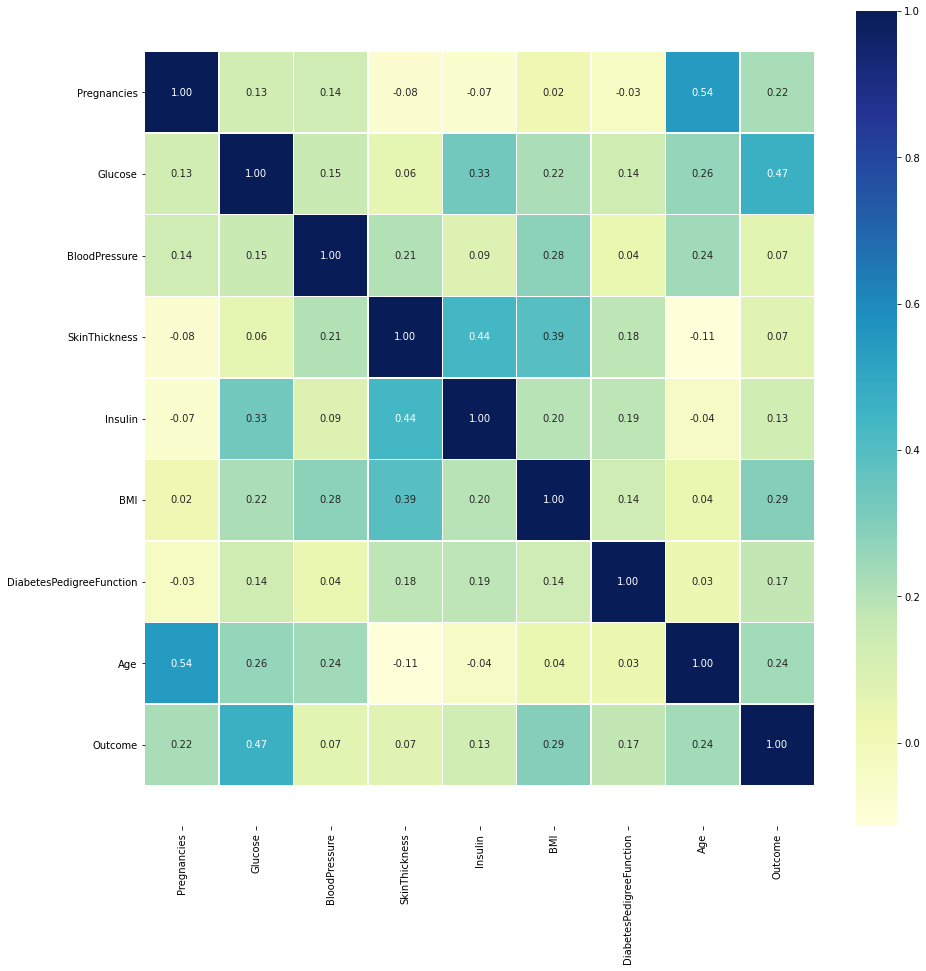

In [ ]:
corr_matrix = df_x.corr()
fig, ax = plt.subplots(figsize=(15, 15))
ax = sns.heatmap(corr_matrix,
                 annot = True,
                 linewidths = 0.5,
                 fmt = ".2f",
                 cmap = "YlGnBu");
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

#### ***Set Feature and Target***

In [ ]:
# Select Features
from sklearn import preprocessing
X_pp = df.drop(['Outcome','Insulin','DiabetesPedigreeFunction'], axis=1)
X = preprocessing.scale(X_pp)
scaler = preprocessing.StandardScaler().fit(X_pp)
scaler

StandardScaler(copy=True, with_mean=True, with_std=True)

In [ ]:
# Select Target
y = df['Outcome']
y

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64

#### ***Set Training and Testing Data***

In [ ]:
# Set Training and Testing Data (70:30)
from sklearn.model_selection import train_test_split, cross_val_score
X_train, X_test, y_train, y_test  = train_test_split(X, y, shuffle = True, test_size=0.2, random_state=0,stratify=y)

# Show the Training and Testing Data
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(614, 6)
(154, 6)
(614,)
(154,)


# **Model**

#### ***GridSearchCV (Random Forest)***

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

n_estimators = [100, 300, 400, 500, 800, 1200]
max_depth = [5, 8, 15, 25, 30]
min_samples_split = [2, 5, 10, 15, 100]
min_samples_leaf = [1, 2, 5, 10]

hyperF = dict(n_estimators = n_estimators, max_depth = max_depth, 
              min_samples_split = min_samples_split, 
              min_samples_leaf = min_samples_leaf)

gridF = GridSearchCV(rfo, hyperF, scoring='roc_auc',
                     cv = 5, verbose = 1, 
                     n_jobs = -1)

bestF = gridF.fit(X, y)

Fitting 5 folds for each of 600 candidates, totalling 3000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   28.3s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:  2.2min
[Parallel(n_jobs=-1)]: Done 446 tasks      | elapsed:  5.1min
[Parallel(n_jobs=-1)]: Done 796 tasks      | elapsed:  9.1min
[Parallel(n_jobs=-1)]: Done 1246 tasks      | elapsed: 14.1min
[Parallel(n_jobs=-1)]: Done 1796 tasks      | elapsed: 20.1min
[Parallel(n_jobs=-1)]: Done 2446 tasks      | elapsed: 27.2min
[Parallel(n_jobs=-1)]: Done 3000 out of 3000 | elapsed: 33.3min finished


In [ ]:
print(" Results from Grid Search " )
print("\n The best estimator across ALL searched params:\n",bestF.best_estimator_)
print("\n The best score across ALL searched params:\n",bestF.best_score_)
print("\n The best parameters across ALL searched params:\n",bestF.best_params_)

 Results from Grid Search 

 The best estimator across ALL searched params:
 RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=15, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=15,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=32, verbose=0,
                       warm_start=False)

 The best score across ALL searched params:
 0.8896834381551363

 The best parameters across ALL searched params:
 {'max_depth': 15, 'min_samples_leaf': 5, 'min_samples_split': 15, 'n_estimators': 100}


#### ***GridSearchCV (KNN)***

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

leaf_size = list(range(1,50))
n_neighbors = list(range(1,30))
p=[1,2]

hyperK = dict(leaf_size=leaf_size, n_neighbors=n_neighbors, p=p)

gridK = GridSearchCV(knn, hyperK, scoring='roc_auc', 
                     cv = 5, verbose = 1, 
                     n_jobs = -1,)

bestK = gridK.fit(X_train, y_train)

Fitting 5 folds for each of 2842 candidates, totalling 14210 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done 584 tasks      | elapsed:    2.5s
[Parallel(n_jobs=-1)]: Done 5384 tasks      | elapsed:   14.0s
[Parallel(n_jobs=-1)]: Done 13384 tasks      | elapsed:   32.4s
[Parallel(n_jobs=-1)]: Done 14210 out of 14210 | elapsed:   34.3s finished


In [ ]:
print(" Results from Grid Search " )
print("\n The best estimator across ALL searched params:\n",bestK.best_estimator_)
print("\n The best score across ALL searched params:\n",bestK.best_score_)
print("\n The best parameters across ALL searched params:\n",bestK.best_params_)

 Results from Grid Search 

 The best estimator across ALL searched params:
 KNeighborsClassifier(algorithm='auto', leaf_size=1, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=8, p=1,
                     weights='uniform')

 The best score across ALL searched params:
 0.7568189368770764

 The best parameters across ALL searched params:
 {'leaf_size': 1, 'n_neighbors': 8, 'p': 1}


#### ***Decision Tree***

**Modeling Decision Tree**

In [ ]:
# Import Module
from sklearn import tree

# Modeling Decision Tree
dtc = tree.DecisionTreeClassifier(min_impurity_decrease=0.01)
dtc.fit(X_train, y_train)

# Predict to Test Data 
y_pred_dtc = dtc.predict(X_test)

**Model Evaluation**

In [ ]:
# Import Module
from sklearn import metrics

# Show the Confussion Matrix
cm_dtc = metrics.confusion_matrix(y_test, y_pred_dtc)
cm_dtc

array([[78, 22],
       [28, 26]])

In [ ]:
# Show the Accuracy, Precision, Recall
acc_dtc = metrics.accuracy_score(y_test, y_pred_dtc)
prec_dtc = metrics.precision_score(y_test, y_pred_dtc)
rec_dtc = metrics.recall_score(y_test, y_pred_dtc)
f1_dtc = metrics.f1_score(y_test, y_pred_dtc)
kappa_dtc = metrics.cohen_kappa_score(y_test, y_pred_dtc)

print("Accuracy:", acc_dtc)
print("Precision:", prec_dtc)
print("Recall:", rec_dtc)
print("F1 Score:", f1_dtc)
print("Cohens Kappa Score:", kappa_dtc)

Accuracy: 0.6753246753246753
Precision: 0.5416666666666666
Recall: 0.48148148148148145
F1 Score: 0.5098039215686274
Cohens Kappa Score: 0.2683390345876092


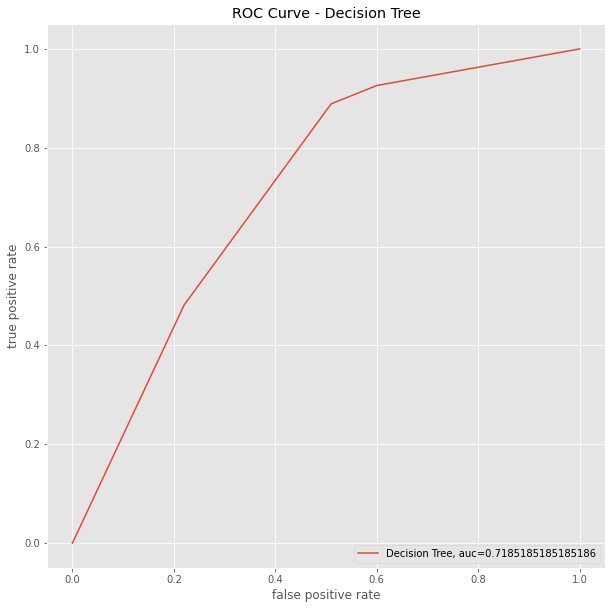

In [ ]:
# Import Visualization Package
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# Set Size and Style
plt.rcParams['figure.figsize'] = (10, 10)
plt.style.use('ggplot')

# Visualize ROC Curve
y_pred_dtc_proba = dtc.predict_proba(X_test)[::,1]
fprdtc, tprdtc, _ = metrics.roc_curve(y_test,  y_pred_dtc_proba)
aucdtc = metrics.roc_auc_score(y_test, y_pred_dtc_proba)
plt.plot(fprdtc,tprdtc,label="Decision Tree, auc="+str(aucdtc))
plt.title('ROC Curve - Decision Tree')
plt.xlabel('false positive rate') 
plt.ylabel('true positive rate')
plt.legend(loc=4)
plt.show()

#### ***Naive Bayes***

**Modeling Naive Bayes**

In [ ]:
# Import Module
from sklearn.naive_bayes import GaussianNB 

# Modeling Naive Bayes Classifier
gnb = GaussianNB()
gnb.fit(X_train, y_train)

# Predict to Test Data
y_pred_gnb= gnb.predict(X_test)

**Model Evaluation**

In [ ]:
# Show the Confussion Matrix
cm_gnb = metrics.confusion_matrix(y_test, y_pred_gnb)
cm_gnb

array([[87, 13],
       [35, 19]])

In [ ]:
# Show the Accuracy, Precision, Recall
acc_gnb = metrics.accuracy_score(y_test, y_pred_gnb)
prec_gnb = metrics.precision_score(y_test, y_pred_gnb)
rec_gnb = metrics.recall_score(y_test, y_pred_gnb)
f1_gnb = metrics.f1_score(y_test, y_pred_gnb)
kappa_gnb = metrics.cohen_kappa_score(y_test, y_pred_gnb)

print("Accuracy:", acc_gnb)
print("Precision:", prec_gnb)
print("Recall:", rec_gnb)
print("F1 Score:", f1_gnb)
print("Cohens Kappa Score:", kappa_gnb)

Accuracy: 0.6883116883116883
Precision: 0.59375
Recall: 0.35185185185185186
F1 Score: 0.4418604651162791
Cohens Kappa Score: 0.24478953821005311


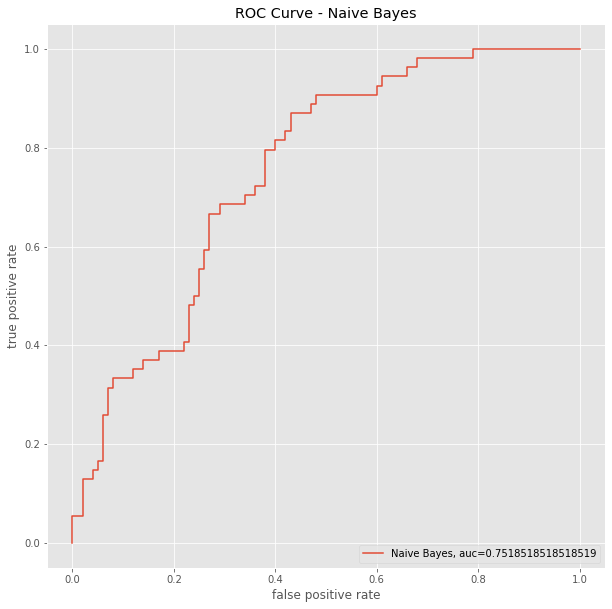

In [ ]:
# ROC Curve
y_pred_gnb_proba = gnb.predict_proba(X_test)[::,1]
fprgnb, tprgnb, _ = metrics.roc_curve(y_test,  y_pred_gnb_proba)
aucgnb = metrics.roc_auc_score(y_test, y_pred_gnb_proba)
plt.plot(fprgnb,tprgnb,label="Naive Bayes, auc="+str(aucgnb))
plt.title('ROC Curve - Naive Bayes')
plt.xlabel('false positive rate') 
plt.ylabel('true positive rate')
plt.legend(loc=4)
plt.show()

#### ***K-Nearest Neighbor***

**Modelling K-NN**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

# Modeling KNN
knn = KNeighborsClassifier(leaf_size = 1,
                           n_neighbors = 24,
                           p = 1)
knn.fit(X_train, y_train)

# Predict to Test Data
y_pred_knn= knn.predict(X_test)

**Model Evaluation**

In [ ]:
# Show the Confussion Matrix
cm_knn = metrics.confusion_matrix(y_test, y_pred_knn)
cm_knn

array([[88, 12],
       [32, 22]])

In [ ]:
# Show the Accuracy, Precision, Recall
acc_knn = metrics.accuracy_score(y_test, y_pred_knn)
prec_knn = metrics.precision_score(y_test, y_pred_knn)
rec_knn = metrics.recall_score(y_test, y_pred_knn)
f1_knn = metrics.f1_score(y_test, y_pred_knn)
kappa_knn = metrics.cohen_kappa_score(y_test, y_pred_knn)

print("Accuracy:", acc_knn)
print("Precision:", prec_knn)
print("Recall:", rec_knn)
print("F1 Score:", f1_knn)
print("Cohens Kappa Score:", kappa_knn)

Accuracy: 0.7142857142857143
Precision: 0.6470588235294118
Recall: 0.4074074074074074
F1 Score: 0.5
Cohens Kappa Score: 0.31417004048582986


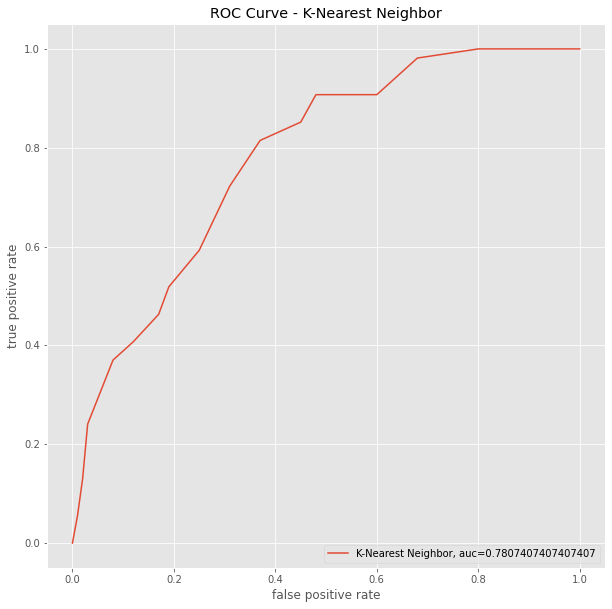

In [ ]:
# ROC Curve
y_pred_knn_proba = knn.predict_proba(X_test)[::,1]
fprknn, tprknn, _ = metrics.roc_curve(y_test,  y_pred_knn_proba)
aucknn = metrics.roc_auc_score(y_test, y_pred_knn_proba)
plt.plot(fprknn,tprknn,label="K-Nearest Neighbor, auc="+str(aucknn))
plt.title('ROC Curve - K-Nearest Neighbor')
plt.xlabel('false positive rate') 
plt.ylabel('true positive rate')
plt.legend(loc=4)
plt.show()

#### ***Random Forest***

In [ ]:
from sklearn.metrics import accuracy_score,recall_score
from sklearn.ensemble import RandomForestClassifier

In [ ]:
accuracy_scores = []
recall_scores = []

for i in range(0, 300):
    rfo = RandomForestClassifier(max_depth= 15, min_samples_leaf= 5, 
                                min_samples_split= 15, n_estimators= 100,random_state=i)
    rfo.fit(X_train, y_train)
    accuracy_scores.append(accuracy_score(y_test, rfo.predict(X_test)))
    recall_scores.append(recall_score(y_test, rfo.predict(X_test)))

print(max(accuracy_scores))
print("Best random i accuracy =",accuracy_scores.index(max(accuracy_scores)))
print(max(recall_scores))
print("Best random i recall =",recall_scores.index(max(recall_scores)))

0.8571428571428571
Best random i accuracy = 260
0.6851851851851852
Best random i recall = 27


In [ ]:
# Modeling Random Forest
rfo = RandomForestClassifier(max_depth= 15, min_samples_leaf= 5, 
                             min_samples_split= 15, n_estimators= 100,random_state=260) #or 46
rfo.fit(X_train, y_train)

# Predict to Test Data
y_pred_rfo= rfo.predict(X_test)

In [ ]:
# Show the Confussion Matrix
cm_rfo = metrics.confusion_matrix(y_test, y_pred_rfo)
cm_rfo

array([[96,  4],
       [18, 36]])

In [ ]:
# Show the Accuracy, Precision, Recall
acc_rfo = metrics.accuracy_score(y_test, y_pred_rfo)
prec_rfo = metrics.precision_score(y_test, y_pred_rfo)
rec_rfo = metrics.recall_score(y_test, y_pred_rfo)
f1_rfo = metrics.f1_score(y_test, y_pred_rfo)
kappa_rfo = metrics.cohen_kappa_score(y_test, y_pred_rfo)

print("Accuracy:", acc_rfo)
print("Precision:", prec_rfo)
print("Recall:", rec_rfo)
print("F1 Score:", f1_rfo)
print("Cohens Kappa Score:", kappa_rfo)

Accuracy: 0.8571428571428571
Precision: 0.9
Recall: 0.6666666666666666
F1 Score: 0.7659574468085106
Cohens Kappa Score: 0.6664040961008271


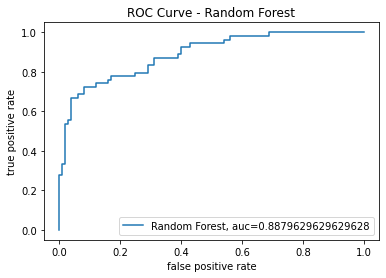

In [ ]:
y_pred_rfo_proba = rfo.predict_proba(X_test)[::,1]
fprrfo, tprrfo, _ = metrics.roc_curve(y_test,  y_pred_rfo_proba)
aucrfo = metrics.roc_auc_score(y_test, y_pred_rfo_proba)
plt.plot(fprrfo,tprrfo,label="Random Forest, auc="+str(aucrfo))
plt.title('ROC Curve - Random Forest')
plt.xlabel('false positive rate')
plt.ylabel('true positive rate')
plt.legend(loc=4)
plt.show()

#### ***Model Comparison***

In [ ]:
# Comparing Model Performance
print("Decision Tree Accuracy = {0:.2f}%".format(acc_dtc*100))
print("Decision Tree Precision = {0:.2f}%".format(prec_dtc*100))
print("Decision Tree Recall = {0:.2f}%".format(rec_dtc*100))
print("Decision Tree F1-Score = {0:.2f}%".format(f1_dtc*100))
print("_______________________")
print("Naive Bayes Accuracy = {0:.2f}%".format(acc_gnb*100))
print("Naive Bayes Precision = {0:.2f}%".format(prec_gnb*100))
print("Naive Bayes Recall = {0:.2f}%".format(rec_gnb*100))
print("Naive Bayes F1-Score = {0:.2f}%".format(f1_gnb*100))
print("_______________________")
print("K-Nearest Neighbor Accuracy = {0:.2f}%".format(acc_knn*100))
print("K-Nearest Neighbor Precision = {0:.2f}%".format(prec_knn*100))
print("K-Nearest Neighbor Recall = {0:.2f}%".format(rec_knn*100))
print("K-Nearest Neighbor F1-Score = {0:.2f}%".format(f1_knn*100))
print("_______________________")
print("Random Forest Accuracy = {0:.2f}%".format(acc_rfo*100))
print("Random Forest Precision = {0:.2f}%".format(prec_rfo*100))
print("Random Forest Recall = {0:.2f}%".format(rec_rfo*100))
print("Random Forest F1-Score = {0:.2f}%".format(f1_rfo*100))

Decision Tree Accuracy = 75.97%
Decision Tree Precision = 63.16%
Decision Tree Recall = 51.06%
Decision Tree F1-Score = 56.47%
_______________________
Naive Bayes Accuracy = 79.22%
Naive Bayes Precision = 67.44%
Naive Bayes Recall = 61.70%
Naive Bayes F1-Score = 64.44%
_______________________
K-Nearest Neighbor Accuracy = 79.22%
K-Nearest Neighbor Precision = 74.19%
K-Nearest Neighbor Recall = 48.94%
K-Nearest Neighbor F1-Score = 58.97%
_______________________
Random Forest Accuracy = 84.42%
Random Forest Precision = 79.49%
Random Forest Recall = 65.96%
Random Forest F1-Score = 72.09%


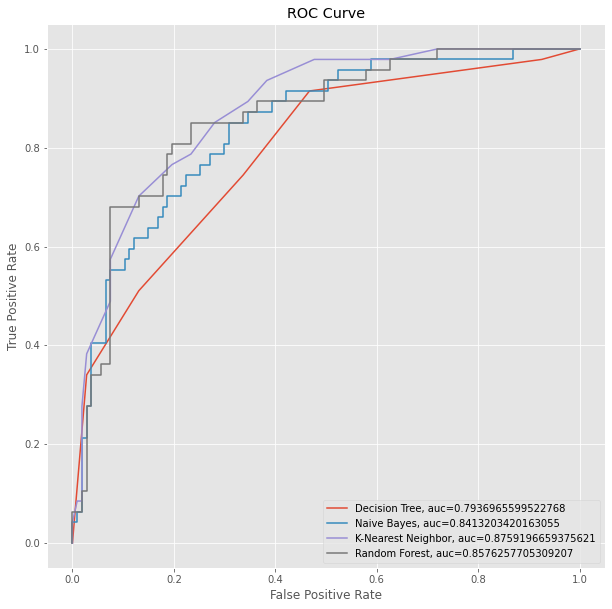

In [ ]:
# Comparing ROC Curve
plt.plot(fprdtc,tprdtc,label="Decision Tree, auc="+str(aucdtc))
plt.plot(fprgnb,tprgnb,label="Naive Bayes, auc="+str(aucgnb))
plt.plot(fprknn,tprknn,label="K-Nearest Neighbor, auc="+str(aucknn))
plt.plot(fprrfo,tprrfo,label="Random Forest, auc="+str(aucrfo))
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc=4)
plt.show()

In [ ]:
#Save Train set

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=8, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=15,
                       min_weight_fraction_leaf=0.0, n_estimators=300,
                       n_jobs=None, oob_score=False, random_state=5, verbose=0,
                       warm_start=False)

In [ ]:
#Save model


In [ ]:
print("Random Forest Accuracy = {0:.2f}%".format(acc_rfo*100))
print("Random Forest Precision = {0:.2f}%".format(prec_rfo*100))
print("Random Forest Recall = {0:.2f}%".format(rec_rfo*100))
print("Random Forest F1-Score = {0:.2f}%".format(f1_rfo*100))

#### ***Kesimpulan***

Disini kita bisa melihat, dari 5 model klasifikasi yang dilakukan, model klasifikasi terbaik yang untuk dataset ini pada :

* Accuracy, Random Forest = 90.16%,
* Precision, Random Forest  = 88.89%,
* Recall, Random Forest = 94.12%,
* F1-Score, Random Forest = 91.43%,
* AUC, Random Forest = 0.939.
